In [8]:
# Exercício de Machine Learning: 
# Criar um Modelo de ML, usando Naive Bayes, p/ o Diagnóstico de doenças em soja.

In [87]:
# Importação das Bibliotecas:
import pandas as pd # Manipulação e Análise dos Dados
from sklearn.preprocessing import LabelEncoder # Transformação atributos categóricos em numéricos
from sklearn.model_selection import train_test_split # Partição conjunto dos Dados: Treino e Teste
from sklearn.metrics import accuracy_score # Métrica de Performance
from yellowbrick.classifier import ConfusionMatrix # Visualização Gráfica da Matriz de Confusão
from sklearn.naive_bayes import GaussianNB # Modelo Naive Bayes

In [89]:
# Upload dos Dados:
dataset = pd.read_csv('../dados/soybean.csv')
dataset.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [20]:
# Dimensão do Dataframe:
# Tem-se, então, 35 atributos previsores e  683 instâncias.
# Informações externas ao exercício constam 19 classes.
dataset.shape

(683, 36)

In [28]:
# Definindo soybeans_attributes como variável que contém os atributos previsores:
soybean_attributes = dataset.iloc[:, 0:35].values
soybean_attributes

array([['october', 'normal', 'gt-norm', ..., 'norm', 'absent', 'norm'],
       ['august', 'normal', 'gt-norm', ..., 'norm', 'absent', 'norm'],
       ['july', 'normal', 'gt-norm', ..., 'norm', 'absent', 'norm'],
       ...,
       ['june', 'lt-normal', '?', ..., '?', '?', 'rotted'],
       ['april', 'lt-normal', '?', ..., '?', '?', 'rotted'],
       ['june', 'lt-normal', '?', ..., '?', '?', 'rotted']], dtype=object)

In [31]:
# Definindo disease como variável que contém as doenças reais:
disease = dataset.iloc[:, 35].values
disease

array(['diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker',
       'diaporthe-stem-canker', 'diaporthe-stem-canker', 'charcoal-rot',
       'charcoal-rot', 'charcoal-rot', 'charcoal-rot', 'charcoal-rot',
       'charcoal-rot', 'charcoal-rot', 'charcoal-rot', 'charcoal-rot',
       'charcoal-rot', 'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot',
       'rhizoctonia-root-rot', 'rhizoctonia-root-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot', 'phytophthora-rot',
       'phytophthora-rot', 'phytophthora-rot'

In [60]:
# Transformando as variáveis categóricas em numéricas:
label_encoder = LabelEncoder()
for t in range(soybean_attributes.shape[1]):
    soybean_attributes[:, t] = label_encoder.fit_transform(soybean_attributes[:, t])

In [65]:
# Particionanado os Conjuntos de Dados p/ Treinamento e Teste:
train_attributes, test_attributes, train_disease, test_disease = train_test_split(soybean_attributes, disease,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
test_attributes

array([[4, 2, 1, ..., 2, 1, 2],
       [2, 1, 3, ..., 0, 0, 3],
       [5, 1, 0, ..., 0, 0, 3],
       ...,
       [7, 2, 1, ..., 2, 1, 2],
       [4, 1, 1, ..., 2, 1, 3],
       [5, 1, 3, ..., 1, 2, 0]], dtype=object)

In [71]:
# Criando Modelo e Treinando:
naive_bayes = GaussianNB()
naive_bayes.fit(train_attributes, train_disease)

GaussianNB()

In [73]:
# Prevendo resultados utilizando os registros históricos de teste:
prevision = naive_bayes.predict(test_attributes)
prevision

array(['alternarialeaf-spot', 'phytophthora-rot', 'herbicide-injury',
       'purple-seed-stain', 'cyst-nematode', 'bacterial-blight',
       'brown-stem-rot', 'bacterial-pustule', 'brown-spot',
       'alternarialeaf-spot', 'charcoal-rot', 'bacterial-blight',
       'anthracnose', 'anthracnose', 'alternarialeaf-spot', 'brown-spot',
       'alternarialeaf-spot', 'alternarialeaf-spot',
       'rhizoctonia-root-rot', 'phytophthora-rot', 'anthracnose',
       'brown-stem-rot', 'phyllosticta-leaf-spot',
       'phyllosticta-leaf-spot', 'diaporthe-stem-canker', 'brown-spot',
       'anthracnose', 'diaporthe-stem-canker', 'bacterial-pustule',
       'phytophthora-rot', 'frog-eye-leaf-spot', 'alternarialeaf-spot',
       'phyllosticta-leaf-spot', 'frog-eye-leaf-spot',
       'frog-eye-leaf-spot', 'bacterial-pustule', 'brown-stem-rot',
       'charcoal-rot', 'brown-spot', 'alternarialeaf-spot',
       'brown-stem-rot', 'alternarialeaf-spot', 'phytophthora-rot',
       'anthracnose', 'bacterial

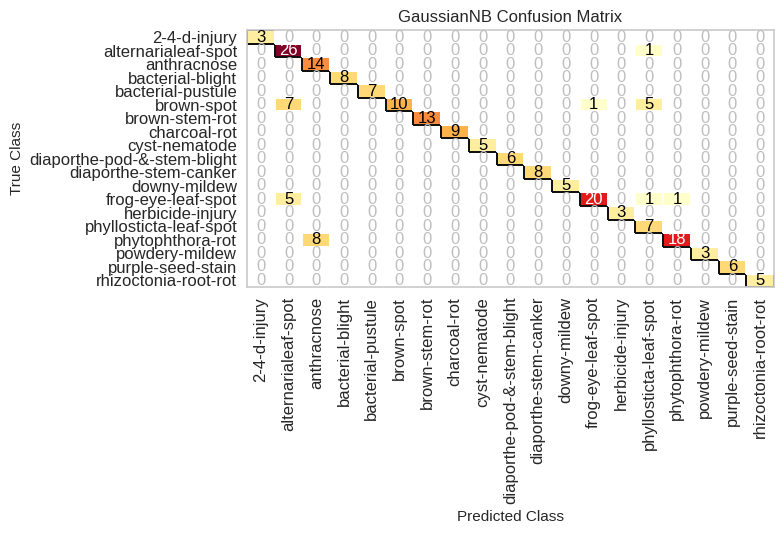

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
# Visualização Gráfica da Matriz de Confusão:
# Diagonal Principal contém os "Verdadeiros Positivos" e "Verdadeiros Negativos"
confusion = ConfusionMatrix(GaussianNB())
confusion.fit(train_attributes, train_disease)
confusion.score(test_attributes, test_disease)
confusion.poof()

In [81]:
# Cálculo da Taxa de Acertos:
hits_score = accuracy_score(test_disease, prevision)
hits_score

0.8585365853658536

In [85]:
# Cálculo da Taxa de Erros:
error_score = 1 -  hits_score
error_score

0.14146341463414636